<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/14_%EB%94%A5%EB%9F%AC%EB%8B%9D_Convolutional_Neural_Network_%EB%89%B4%EB%9F%B4%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) 기초 정리

## 1. CNN이란?
이번 시간에는 컴퓨터 비전 뉴럴 네트워크의 근본인 **CNN(Convolutional Neural Network)** 에 대해 알아본다.  
CNN은 이미지 데이터를 다루기 위해 설계된 신경망 구조로, 이미지의 **공간적 구조(spatial information)** 를 효과적으로 활용한다.

CNN에서 핵심이 되는 연산은 **Convolution(합성곱)** 이다.

---

## 2. Fully Connected Layer의 한계
이미지에 Fully Connected Layer를 바로 적용하면 다음과 같은 문제가 발생한다.

- 이미지를 픽셀 단위로 쪼개어 하나의 벡터로 변환
- 이미지의 공간적 정보(눈, 코, 입의 위치 등)가 완전히 사라짐
- 학습 데이터가 충분하면 학습은 되지만 **비효율적**

이미지는 본질적으로 **공간적인 의미**를 가지므로, 이를 고려하지 않는 방식은 성능과 효율 모두에서 불리하다.

---

## 3. Feature와 Convolution의 역할
이미지를 분류할 때는 각 클래스마다 **특징(Feature)** 이 존재한다.

- 수달 이미지 → 수달을 구분하는 특징
- 호랑이 이미지 → 호랑이를 구분하는 특징

이러한 Feature는 **Convolution 연산을 Neural Network와 결합**함으로써 효과적으로 추출할 수 있다.

---

## 4. Convolution 연산의 개념
Convolution은 매우 단순한 연산이다.

- 곱셈
- 덧셈

### 구성 요소
- **Input Image**: 픽셀 값으로 이루어진 이미지
- **Kernel(Filter)**: 작은 크기의 가중치 행렬

---

## 5. Convolution 연산 과정 (예시)
- 입력 이미지: 4×4
- 커널 크기: 2×2 (w1, w2, w3, w4)

### 연산 방법
1. 커널을 이미지의 한 위치에 놓는다
2. 겹치는 픽셀과 커널 가중치를 곱한다
3. 모든 값을 더해 하나의 출력 값을 만든다
4. 커널을 슬라이딩하며 반복 수행

### 결과
- 4×4 이미지에 2×2 커널 적용
- 출력 이미지 크기: **3×3**

---

## 6. Input Size와 Kernel Size에 따른 Output Size
일반적으로 다음과 같은 관계를 가진다.

```

Output Size = Input Size - Kernel Size + 1

```

### 예시
- Input: 8×8
- Kernel: 3×3
- Output: 6×6

---

## 7. Convolution이 중요한 이유: Feature Extraction
Convolution은 이미지에서 **특정 패턴을 강조**하는 데 매우 유용하다.

### 예시 커널
- 세로 엣지 검출 커널  
```

[ 1  -1 ]
[ 1  -1 ]

```

- 가로 엣지 검출 커널  
```

[  1   1 ]
[ -1  -1 ]

```

각 커널은 서로 다른 특징(엣지, 방향성 등)을 강조한 출력 이미지를 생성한다.

---

## 8. 다양한 커널과 다양한 Feature
- 커널을 다르게 정의하면 다른 Feature가 강조됨
- 대각선 엣지, 특정 패턴 등도 검출 가능
- 여러 커널을 사용하면 다양한 Feature Map을 얻을 수 있음

---

## 9. Convolution의 반복과 Feature의 계층 구조
Convolution을 반복 적용하면 점점 더 복잡한 Feature를 추출할 수 있다.

### Feature 계층
- **Low-level Feature**
- 엣지
- 색상 변화
- 단순 패턴

- **Mid-level Feature**
- 곡선
- 원형 구조
- 눈, 코 등의 부분 구조

- **High-level Feature**
- 얼굴
- 사물의 형태
- 의미 있는 객체

---

## 10. CNN에서의 학습
이번 예제에서는 커널을 직접 정의했지만, 실제 CNN에서는 다음과 같다.

- 커널 값은 **Backpropagation**을 통해 자동으로 학습됨
- 각 레이어마다 서로 다른 커널이 학습됨
- 네트워크가 스스로 분류에 유리한 Feature를 찾아냄

---

## 11. 정리
- CNN은 이미지의 공간적 구조를 활용하는 신경망
- Convolution을 통해 Feature를 추출
- Convolution을 반복하며 점점 고수준의 Feature를 학습
- 실제 CNN에서는 커널이 자동으로 학습됨

---

## 12. 다음 내용 예고
CNN을 제대로 이해하기 위해서는 다음 개념들이 필요하다.

- 여러 개의 커널로 인한 **Depth**
- **Batch Dimension**
- 전체 Tensor의 차원 구조

이 내용은 다음 시간에 다룬다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.03MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.5MB/s]


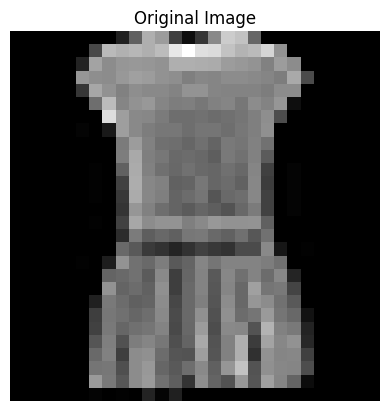

In [3]:
image, label = dataset[3]

plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

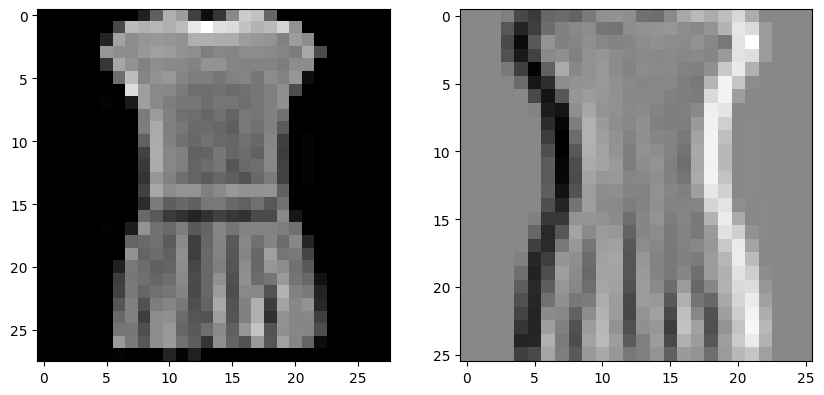

In [4]:
kernel = torch.Tensor([[1,0,-1],
                      [1,0,-1],
                      [1,0,-1]])
kernel = kernel.view(1,1,3,3)

convoluted_image = F.conv2d(image, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(image.squeeze().numpy(), cmap='gray')
axes[1].imshow(convoluted_image.squeeze().detach().numpy(), cmap='gray')

plt.show()

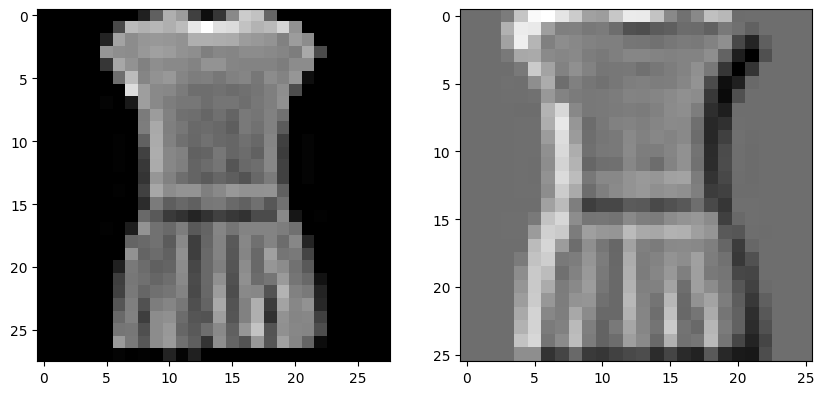

In [5]:
# Define an edge-detecting kernel
kernel = torch.Tensor([[-2, -1, 0],
                       [-1, 1, 1],
                       [0, 1, 2]])
kernel = kernel.view(1, 1, 3, 3)  # reshaping for the 2D convolutional operation

# Applying the convolution on the image
convoluted_image = F.conv2d(image, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns

axes[0].imshow(image.squeeze().numpy(), cmap='gray')
axes[1].imshow(convoluted_image.squeeze().detach().numpy(), cmap='gray')

plt.show()

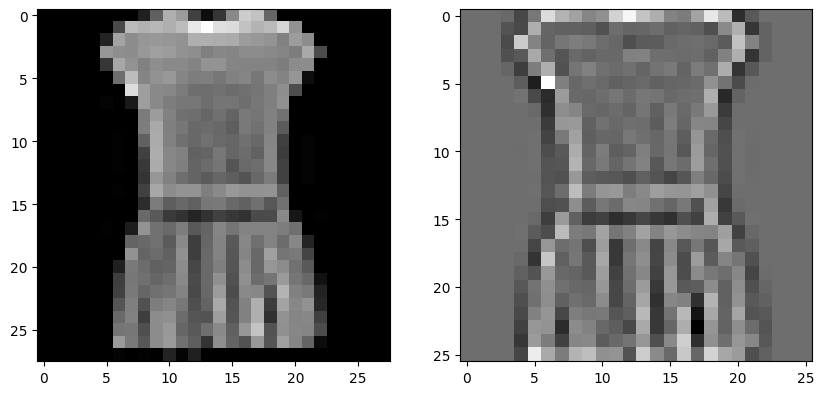

In [6]:
# Define an edge-detecting kernel
kernel = torch.Tensor([[-1,-1,-1],
                       [-1, 8,-1],
                       [-1,-1,-1]])
kernel = kernel.view(1, 1, 3, 3)  # reshaping for the 2D convolutional operation

# Applying the convolution on the image
convoluted_image = F.conv2d(image, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns

axes[0].imshow(image.squeeze().numpy(), cmap='gray')
axes[1].imshow(convoluted_image.squeeze().detach().numpy(), cmap='gray')

plt.show()